## Sanju Mathew - Project on Unsupervised Learning

### Objective
* Apply dimensionality reduction technique PCA and train a model using principle components instead of training the model using just the raw data.

### Step 1: Data pre-processing
* Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set1")
%matplotlib inline

In [2]:
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
df.shape

(846, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [6]:
replaceStruct = {
                "class": {'car': 1, 'van': 2 ,'bus': 3}
                    }
df=df.replace(replaceStruct)

In [7]:
FilNa = df[df.radius_ratio.isna() == True]['radius_ratio'].index
df.filter(items = FilNa, axis=0)['radius_ratio']

9     NaN
78    NaN
159   NaN
287   NaN
345   NaN
467   NaN
Name: radius_ratio, dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) 

In [9]:
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_scaled = imputer.fit_transform(df_scaled)

In [10]:
data = scaler.inverse_transform(df_scaled)

df=pd.DataFrame(data=data[0:,0:],
    index=[i for i in range(data.shape[0])],
    columns=[i for i in df.columns])

for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('int64')

df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             45                      19                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176                379                        184   
1              170                330                        158   
2              223                635                        220   
3              160                309                        127   
4              241                325                        188   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70               6                16   
1                           72               9                14   
2                           73              14                 9   
3                           63               6                10   
4                          127               9                11   

   skewness_about.2  hollows_ratio  class  
0               187            197      2  
1               189            199      2  
2               188            196      1  
3               199            207      2  
4               180            183      3

In [11]:
df.isna().apply(pd.value_counts).T

False
compactness                    846
circularity                    846
distance_circularity           846
radius_ratio                   846
pr.axis_aspect_ratio           846
max.length_aspect_ratio        846
scatter_ratio                  846
elongatedness                  846
pr.axis_rectangularity         846
max.length_rectangularity      846
scaled_variance                846
scaled_variance.1              846
scaled_radius_of_gyration      846
scaled_radius_of_gyration.1    846
skewness_about                 846
skewness_about.1               846
skewness_about.2               846
hollows_ratio                  846
class                          846

In [12]:
df.filter(items = FilNa, axis=0)['radius_ratio']

9      195
78     201
159    158
287    144
345    183
467    178
Name: radius_ratio, dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

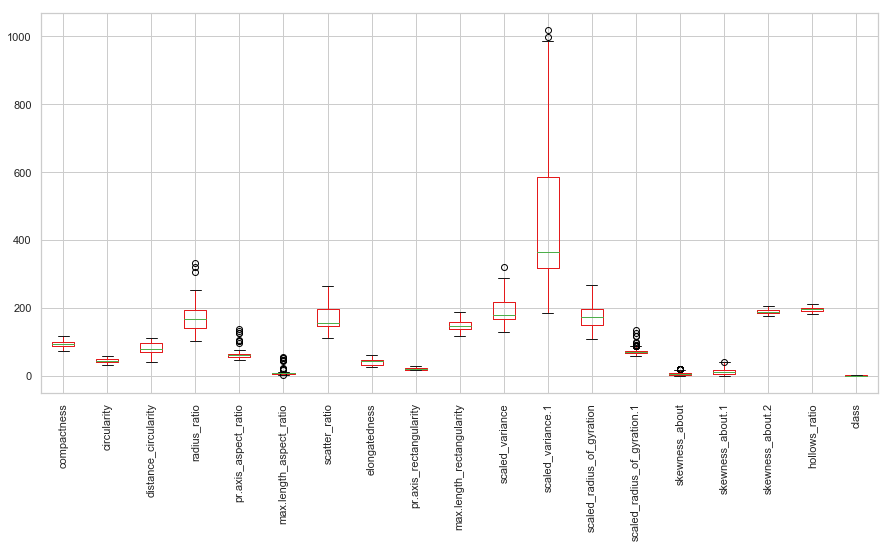

In [13]:
df.plot(kind='box', figsize=(15,7))
plt.xticks(rotation=90)

Outliers removed with standard deviation more than ±3: 22


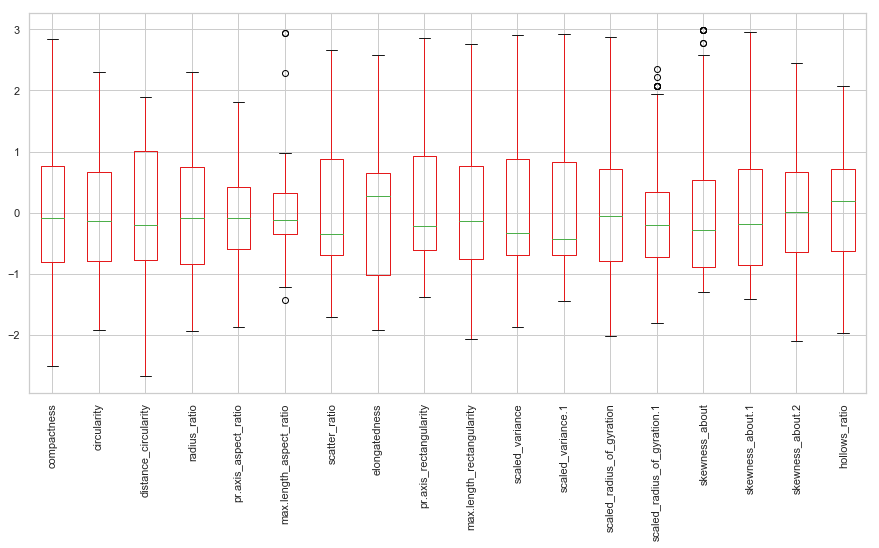

In [14]:
from scipy import stats
from scipy.stats import zscore
df_z = df.drop(columns = 'class').apply(zscore)

outliers = []
for i in range(0, df_z.shape[1]):
    for j in range(0, df_z.shape[0]):
#        MinWhi, MaxWhi = (np.percentile(df_z.iloc[:,i], 25, interpolation = 'midpoint')) - ((stats.iqr(df_z.iloc[:,i], interpolation = 'midpoint'))*1.5),  (np.percentile(df_z.iloc[:,i], 75, interpolation = 'midpoint')) + ((stats.iqr(df_z.iloc[:,i], interpolation = 'midpoint'))*1.5)
        if df_z.iloc[j,i] > 3 or df_z.iloc[j,i] < -3:#MinWhi, MaxWhi
            if j not in outliers:
                outliers.append(j)

df = df.drop(index = outliers)
df_z = df_z.drop(index = outliers)

df = df.reset_index(drop=True)
df_z = df_z.reset_index(drop=True)

df_z.plot(kind='box', figsize=(15,7))
plt.xticks(rotation=90)
print('Outliers removed with standard deviation more than ±3:', len(outliers))

In [15]:
df.describe(include='all').T

count        mean         std    min    25%  \
compactness                  824.0   93.548544    8.090471   73.0   87.0   
circularity                  824.0   44.774272    6.117522   33.0   40.0   
distance_circularity         824.0   81.927184   15.711696   40.0   70.0   
radius_ratio                 824.0  167.697816   31.909040  104.0  141.0   
pr.axis_aspect_ratio         824.0   61.218447    5.644240   47.0   57.0   
max.length_aspect_ratio      824.0    8.162621    2.220037    2.0    7.0   
scatter_ratio                824.0  168.320388   32.525183  112.0  146.0   
elongatedness                824.0   41.012136    7.758340   26.0   33.0   
pr.axis_rectangularity       824.0   20.536408    2.526388   17.0   19.0   
max.length_rectangularity    824.0  147.796117   14.468626  118.0  137.0   
scaled_variance              824.0  187.402913   29.903698  130.0  167.0   
scaled_variance.1            824.0  436.758495  171.663036  184.0  318.0   
scaled_radius_of_gyration    824.0  174.108010   31.951273  109.0  149.0   
scaled_radius_of_gyration.1  824.0   72.064320    6.303540   59.0   67.0   
skewness_about               824.0    6.271845    4.795085    0.0    2.0   
skewness_about.1             824.0   12.516990    8.817562    0.0    5.0   
skewness_about.2             824.0  188.972087    6.140751  176.0  185.0   
hollows_ratio                824.0  195.669903    7.365333  181.0  191.0   
class                        824.0    1.742718    0.837644    1.0    1.0   

                               50%    75%    max  
compactness                   93.0  100.0  117.0  
circularity                   44.0   49.0   59.0  
distance_circularity          79.0   98.0  112.0  
radius_ratio                 166.0  194.0  246.0  
pr.axis_aspect_ratio          61.0   65.0   76.0  
max.length_aspect_ratio        8.0   10.0   22.0  
scatter_ratio                157.0  198.0  257.0  
elongatedness                 43.0   46.0   61.0  
pr.axis_rectangularity        20.0   23.0   28.0  
max.length_rectangularity    146.0  159.0  188.0  
scaled_variance              178.0  216.0  280.0  
scaled_variance.1            363.5  586.0  957.0  
scaled_radius_of_gyration    173.0  198.0  268.0  
scaled_radius_of_gyration.1   71.0   75.0   90.0  
skewness_about                 5.0    9.0   21.0  
skewness_about.1              11.0   19.0   39.0  
skewness_about.2             189.0  193.0  204.0  
hollows_ratio                197.0  201.0  211.0  
class                          1.0    3.0    3.0

* Missing Values: 41 values that were missing in the data was imputed using KNNImputer after standardisation
* Numerical data: Class column was changed to integer type (1, 2, 3) from object type (Car, Van, Bus)
* Outliers: 22 rows that had z scores above and below ±3 were dropped. This gave better results than dropping outliers above and below 1.5 times IQR

Modified data has slightly changed from original data for below columns
* ±0.5 in Median: scaled_variance, scaled_variance.1 & scaled_radius_of_gyration
* ±0.75 in 25th percentile: scatter_ratio & scaled_variance.1
* ±0.5 in Mean & Standard Deviation: circularity, distance_circularity, max.length_aspect_ratio & radius_ratio

### Step 2: Understanding the attributes
* Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

Class: 1 = Car | 2 = Van | 3 = Bus


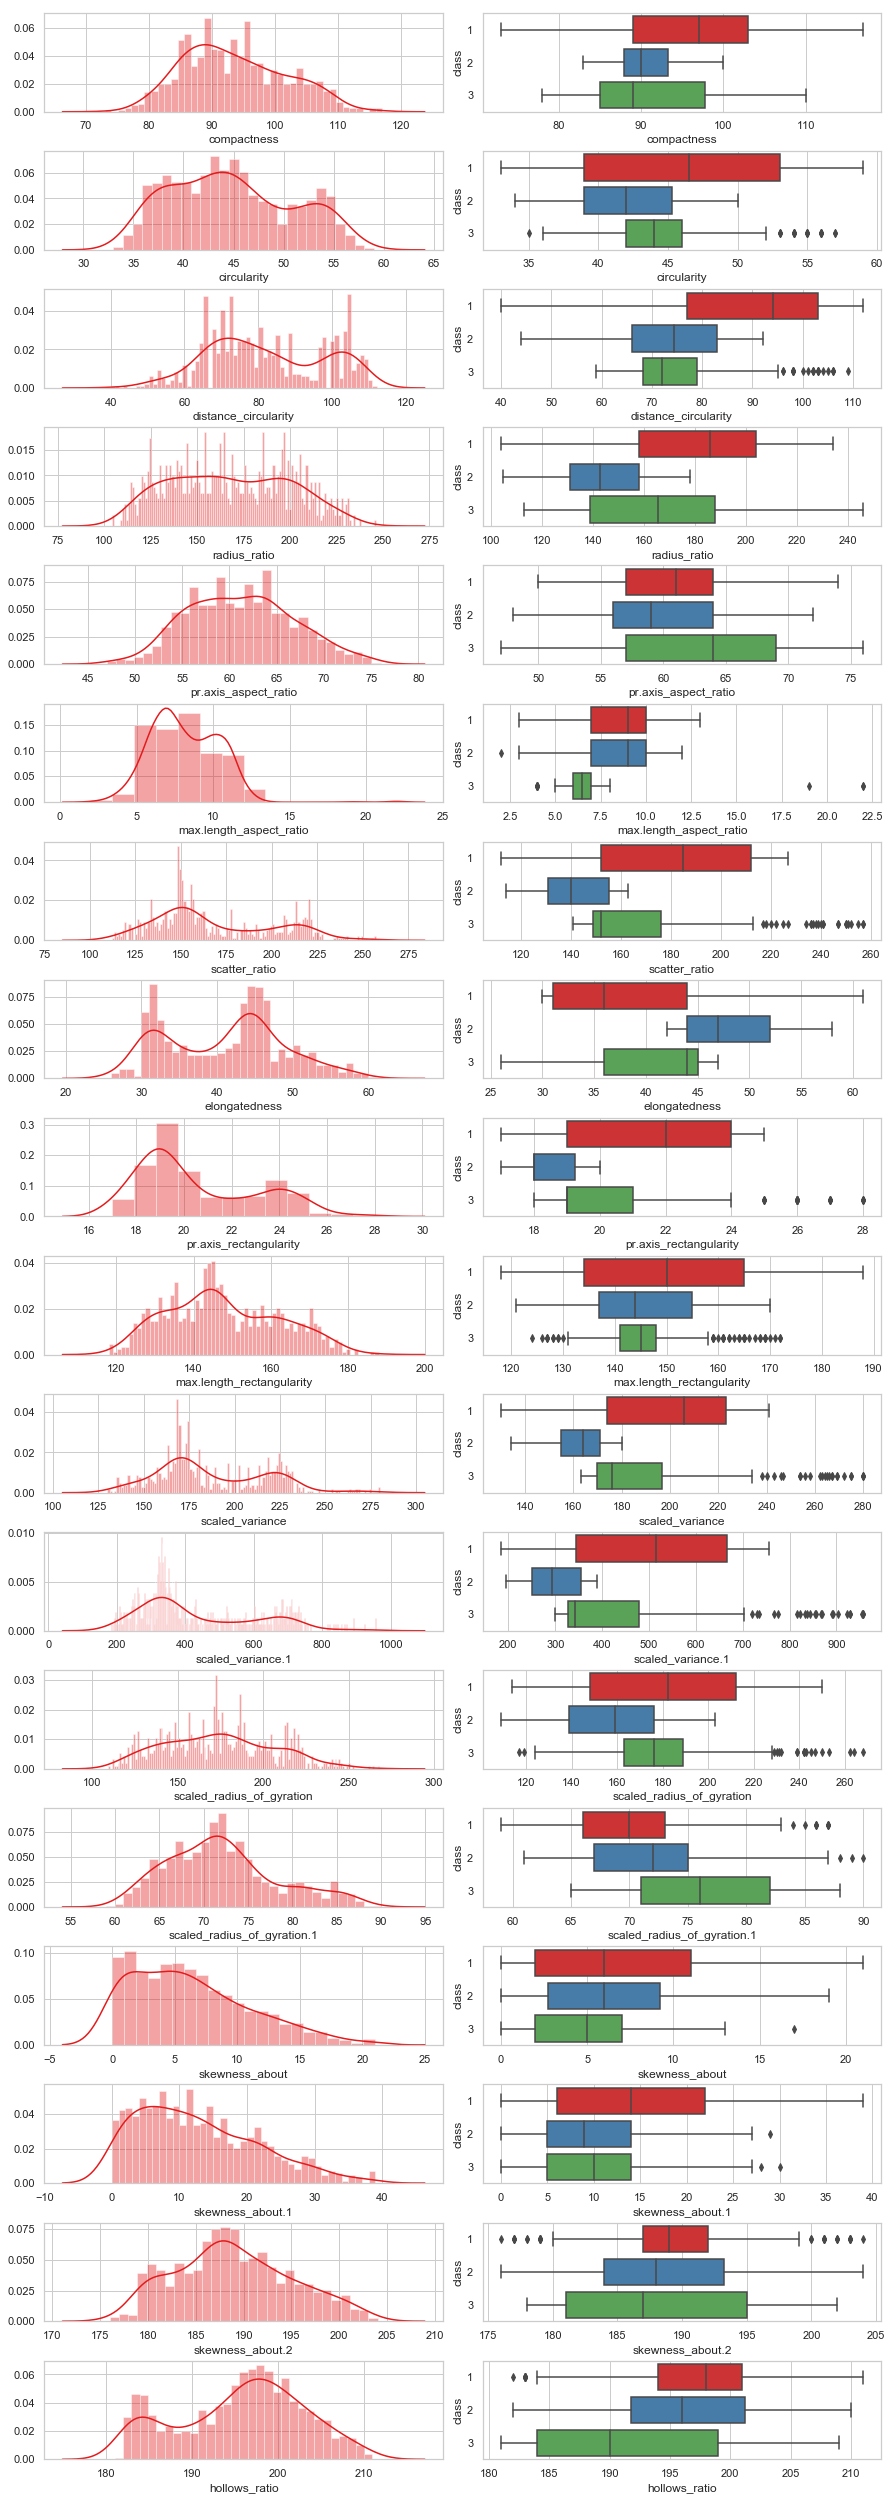

In [16]:
f, ax = plt.subplots(18, 2, figsize = (15,45))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.4)
for i in range(0, 18):
    col = df.columns[i]
    sns.distplot(df[col], bins = df[col].nunique(), ax = ax[i,0])
    sns.boxplot(x=col, y='class', orient="h", data=df, ax = ax[i,1])
print("Class: 1 = Car | 2 = Van | 3 = Bus")

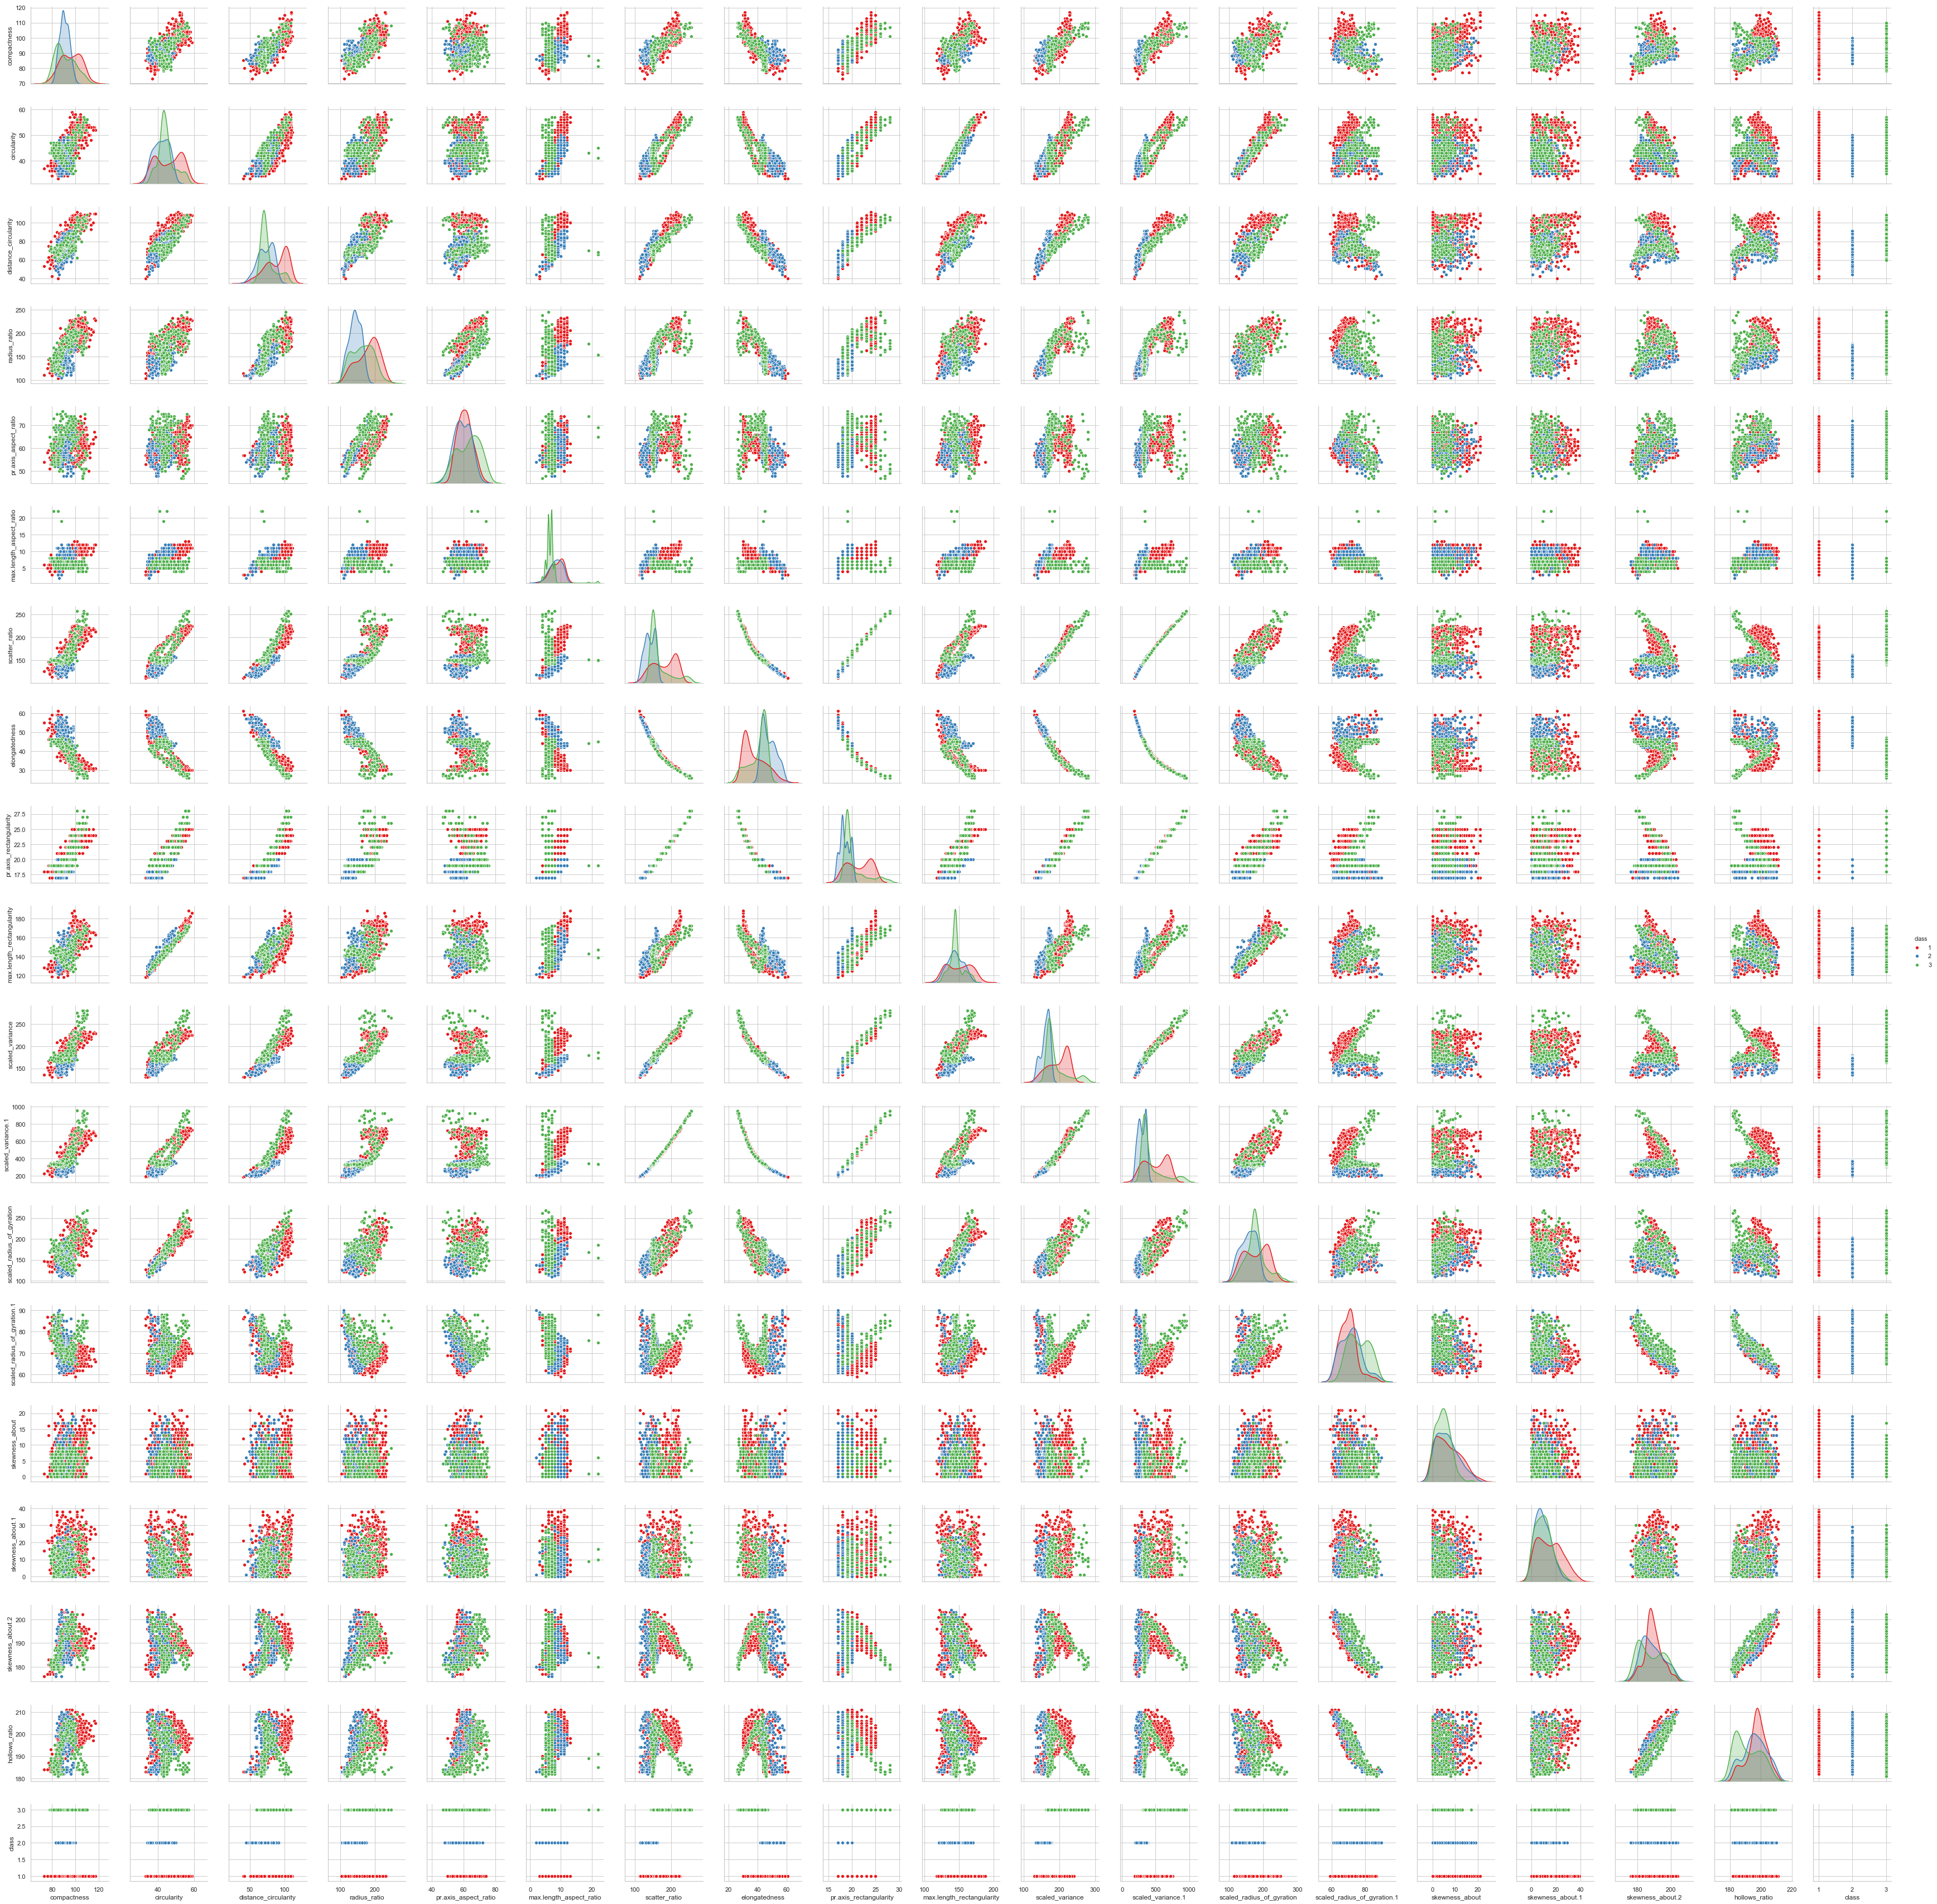

In [17]:
sns.pairplot(df, hue = 'class')

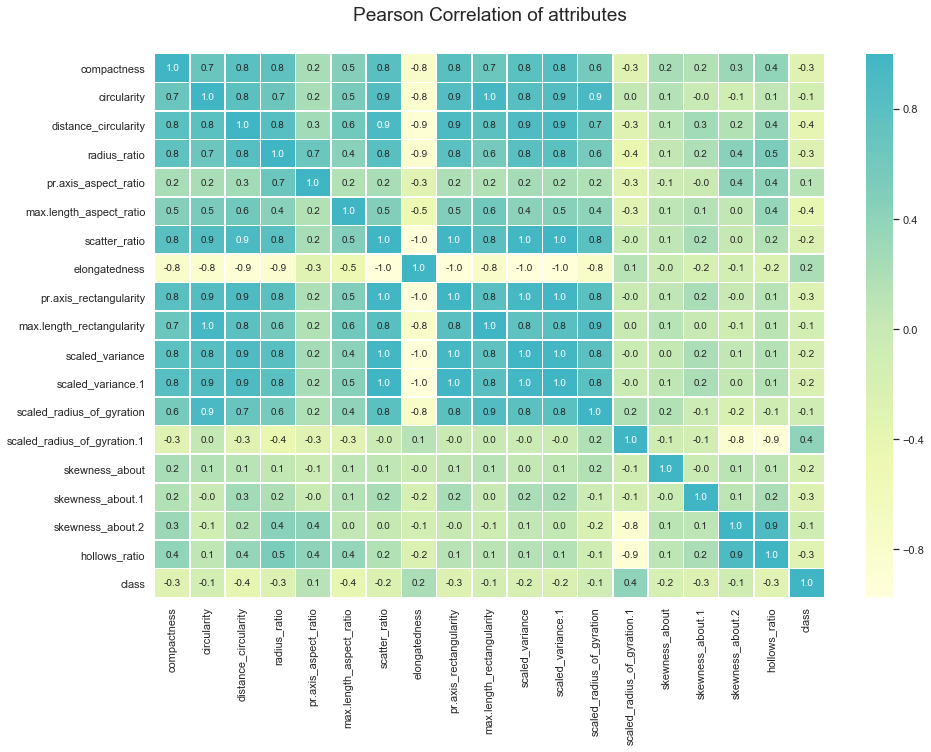

In [18]:
corr = df.corr()
plt.figure(figsize=(15, 10))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.1f', center = 1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = df_z
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
6                 scatter_ratio  1593.31
11            scaled_variance.1   874.02
7                 elongatedness   150.89
8        pr.axis_rectangularity    86.58
10              scaled_variance    60.23
1                   circularity    53.47
3                  radius_ratio    37.20
9     max.length_rectangularity    28.75
17                hollows_ratio    18.75
16             skewness_about.2    17.25
2          distance_circularity    14.44
12    scaled_radius_of_gyration    13.59
13  scaled_radius_of_gyration.1    10.92
4          pr.axis_aspect_ratio     8.78
0                   compactness     5.42
5       max.length_aspect_ratio     3.31
15             skewness_about.1     1.69
14               skewness_about     1.34

max.length_aspect_ratio  scaled_variance  scaled_variance.1  \
Importance                 0.284611         0.204658           0.139646   

            scaled_radius_of_gyration.1  max.length_rectangularity  \
Importance                     0.069538                   0.064065   

            skewness_about  distance_circularity  pr.axis_aspect_ratio  \
Importance        0.047631              0.047082              0.035935   

            compactness  scaled_radius_of_gyration  pr.axis_rectangularity  \
Importance     0.024548                   0.024247                0.017108   

            skewness_about.1  skewness_about.2  circularity  hollows_ratio  \
Importance          0.014745          0.011213     0.004709       0.003885   

            elongatedness  radius_ratio  scatter_ratio  
Importance       0.003762      0.002616            0.0

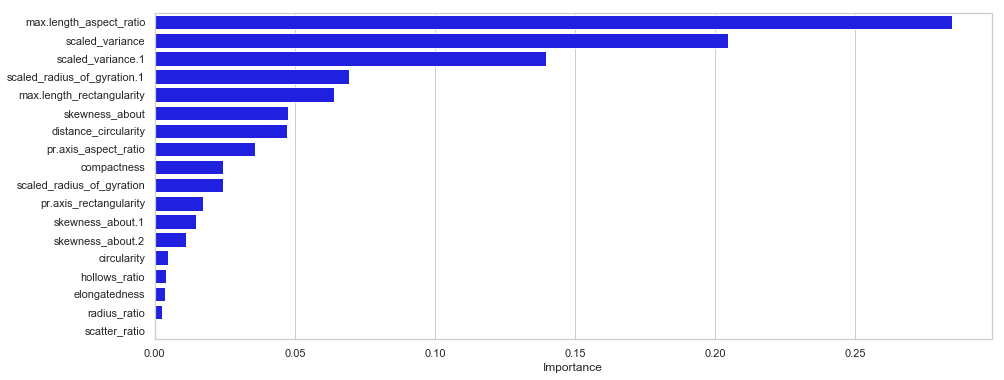

In [20]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X, df[['class']])
df_importance = pd.DataFrame(DT_model.feature_importances_, columns = ["Importance"], index = X.columns).sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x = df_importance["Importance"], y = df_importance.index, orient='h', color = "blue")
df_importance.T

 Drop Columns: Index(['circularity', 'scaled_variance.1', 'scaled_variance', 'compactness',
       'pr.axis_rectangularity', 'elongatedness', 'scatter_ratio',
       'max.length_aspect_ratio', 'distance_circularity'],
      dtype='object')


scaled_radius_of_gyration.1  skewness_about.2  pr.axis_aspect_ratio  \
Slope                     0.767348          0.582002              0.433701   

       max.length_rectangularity  scaled_radius_of_gyration  skewness_about.1  \
Slope                   0.096135                   0.016313         -0.049835   

       hollows_ratio  skewness_about  radius_ratio  
Slope      -0.068796       -0.102215      -0.41746

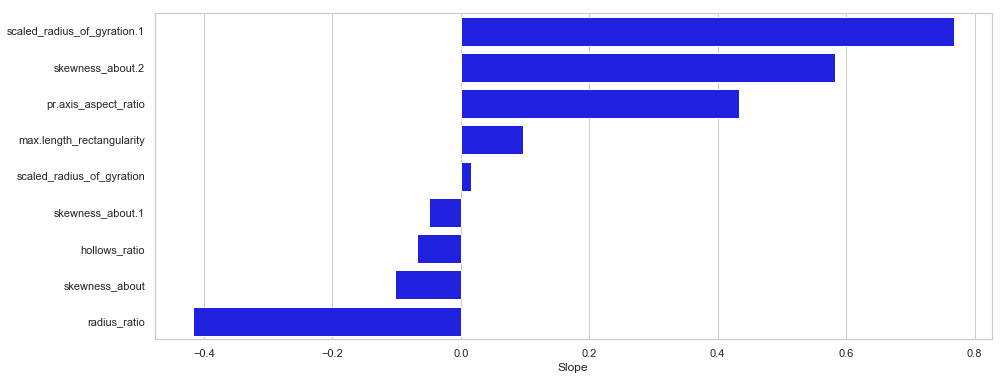

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.03)
lasso.fit(X, df[['class']])
df_importance = pd.DataFrame(lasso.coef_, columns = ["Slope"], index = X.columns).sort_values(by = "Slope", ascending=False)
DropCol = df_importance[df_importance.Slope == 0].index
print(' Drop Columns:', DropCol)
df_importance = df_importance.drop(index = DropCol)
plt.figure(figsize=(15, 6))
sns.barplot(x = df_importance["Slope"], y = df_importance.index, orient='h', color = "blue")
df_importance.T

In [22]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

y = df[['class']]
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

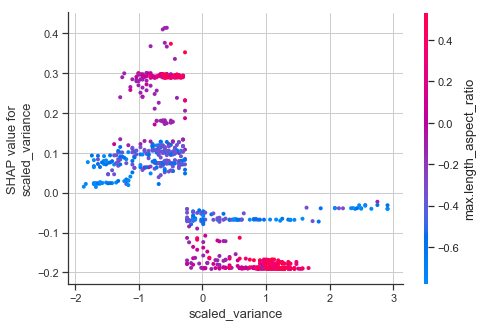

In [24]:
shap.dependence_plot('scaled_variance', shap_values, X)

In [23]:
shap.force_plot(explainer.expected_value, shap_values, X)

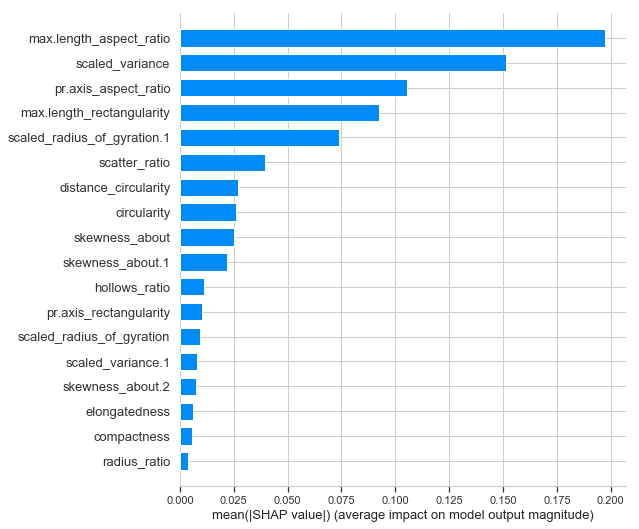

In [24]:
#shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [25]:
df_FS = df_z.drop(columns = ['circularity', 'scaled_variance.1', 'scaled_variance', 'compactness',
                             'pr.axis_rectangularity', 'scatter_ratio', 'distance_circularity'])

#### Dropping following 7 columns based on Boxplots, Pairplot, Variance Inflation Factor, Pearson Correlation, Decision Tree, SHAP & Lasso Coefficient

They were chosen after multiple iterations to produce the best average validation score in Cross Validation. Feature selection based on Lasso produced the best results in this case. Later 'max.length_aspect_ratio' and 'elongatedness' were added back to improve the scores and variance.
* circularity
* scaled_variance
* scaled_variance.1
* pr.axis_rectangularity
* scatter_ratio
* distance_circularity'
* compactness

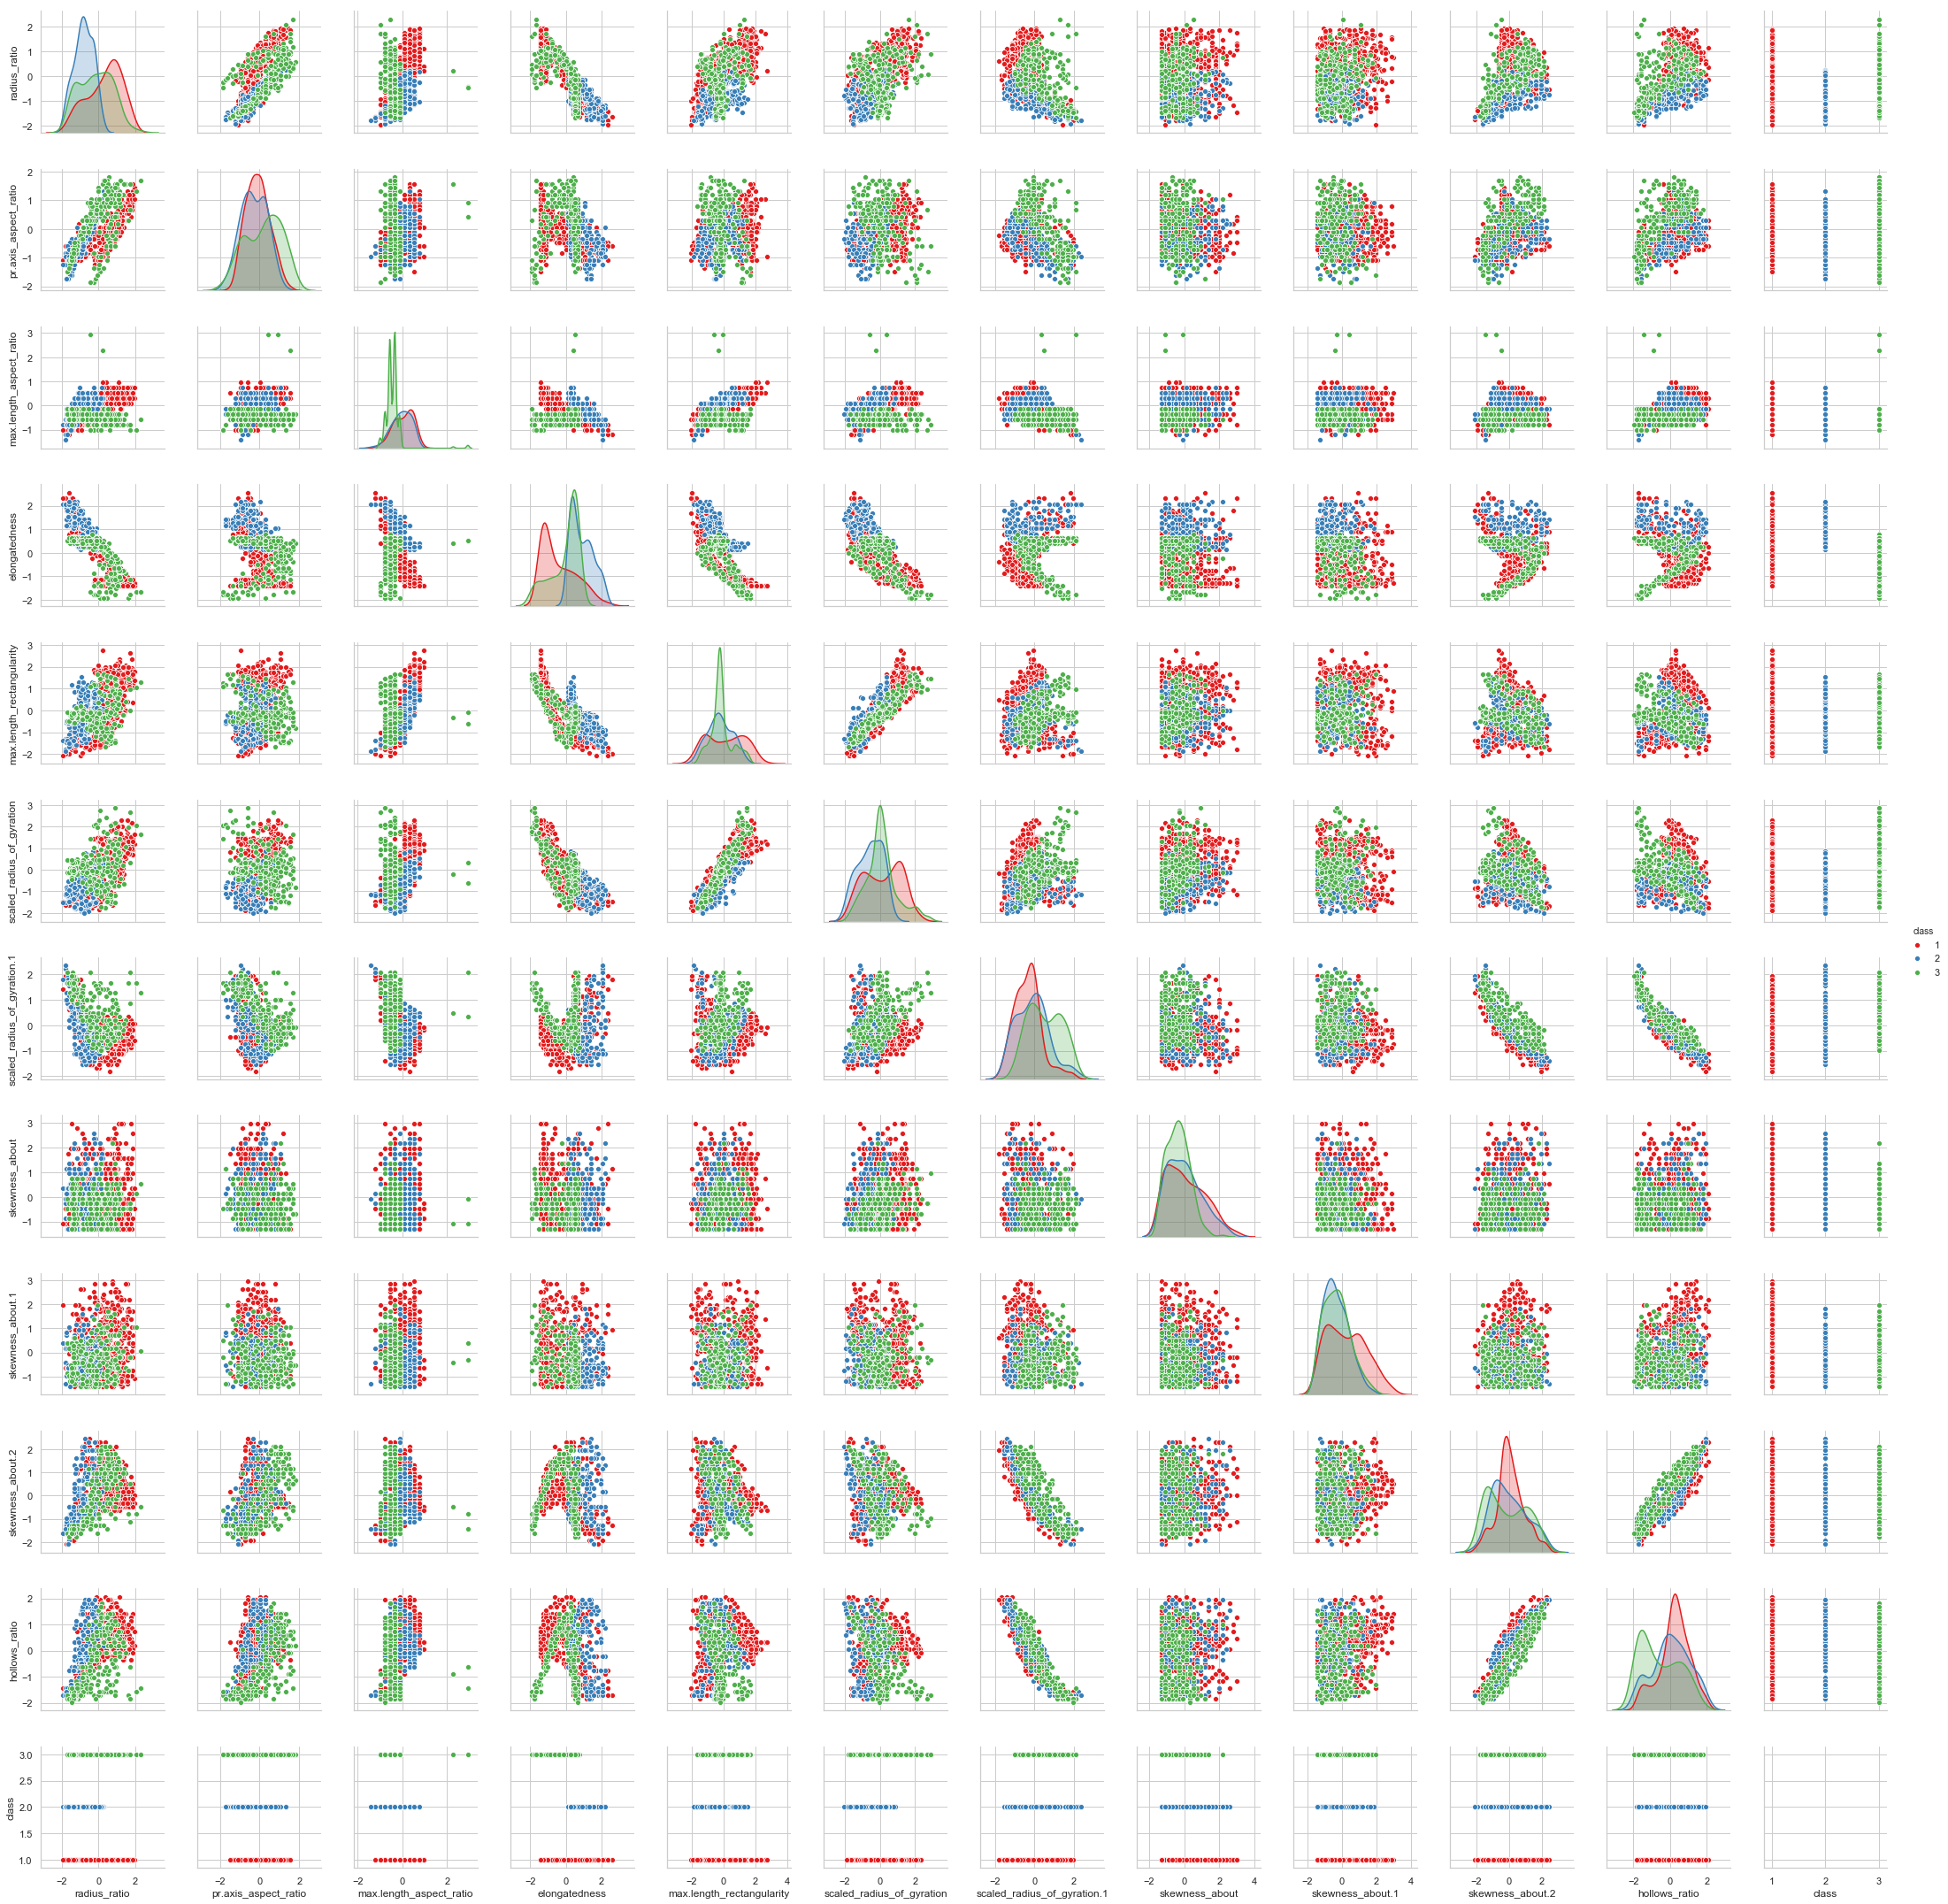

In [26]:
df_FS['class'] = df['class']
sns.pairplot(df_FS, hue = 'class')

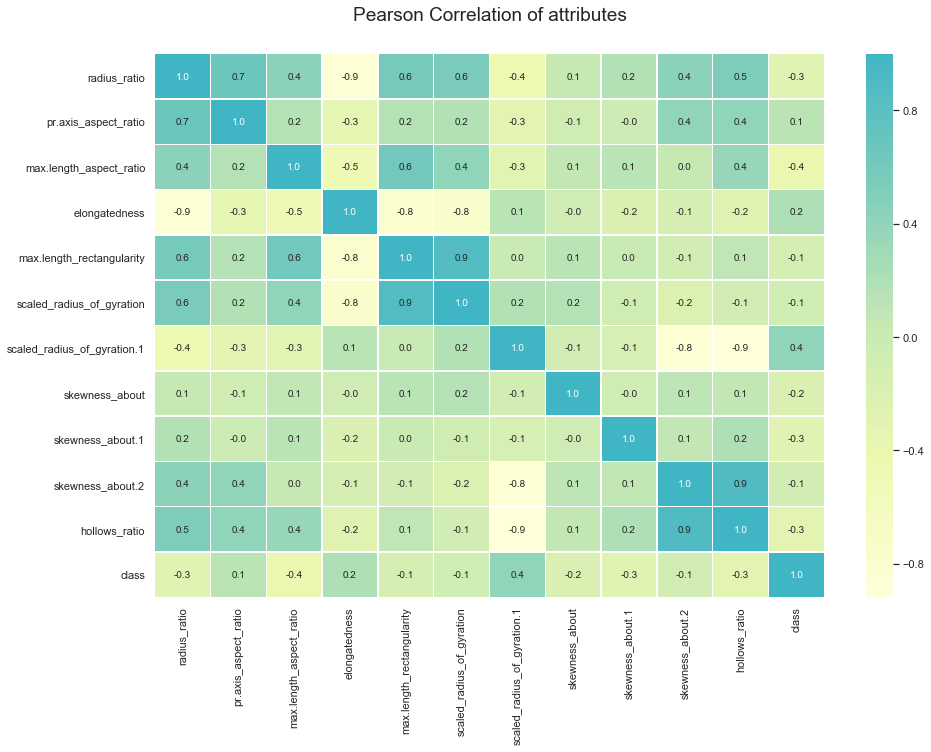

In [27]:
corr = df_FS.corr()
plt.figure(figsize=(15, 10))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.1f', center = 1)

In [28]:
vif = pd.DataFrame()
XFS = df_FS.drop(columns = 'class')
vif['Features'] = XFS.columns
vif['VIF'] = [variance_inflation_factor(XFS.values, i) for i in range(XFS.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  radius_ratio  19.88
10                hollows_ratio  16.31
3                 elongatedness  13.65
9              skewness_about.2  10.22
6   scaled_radius_of_gyration.1   8.47
4     max.length_rectangularity   6.87
5     scaled_radius_of_gyration   6.60
1          pr.axis_aspect_ratio   4.47
2       max.length_aspect_ratio   2.83
8              skewness_about.1   1.41
7                skewness_about   1.15

* Variance Inflation Factor (VIF) reduced from 1593.31 to 19.88 after dropping 7 columns
* Most of high Pearson Correlation values (ρ > 0.9) have also been dropped other than hollows_ratio, elongatedness & scaled_radius_of_gyration
* Keeping this features contributed to better performance of model

In [29]:
y = df.pop('class')
XFS.head()

radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0      0.270956              1.306848                 0.313459       0.136570   
1     -0.835850             -0.595412                 0.095019       0.520843   
2      1.198279              0.545944                 0.313459      -1.144341   
3     -0.297404              0.165492                 0.095019       0.648935   
4      0.091474             -1.483133                -0.560301      -1.912888   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                   0.758332                   0.285777   
1                  -0.344578                  -0.513555   
2                   0.689401                   1.392544   
3                  -0.344578                  -1.466604   
4                   1.447652                   2.745259   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.328104       -0.072791          0.380870   
1                    -0.060690        0.538946          0.156798   
2                     0.073017        1.558508         -0.403383   
3                    -1.264055       -0.072791         -0.291347   
4                     1.677505       -0.276704         -0.403383   

   skewness_about.2  hollows_ratio  
0         -0.313634       0.183957  
1          0.011133       0.452977  
2         -0.151250       0.049447  
3          1.634963       1.529056  
4         -1.287932      -1.699181

### Step 3: Split the data into train and test
* Suggestion: specify “random state” if you are using train_test_split from Sklearn

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Class: 1 = Car | 2 = Van | 3 = Bus


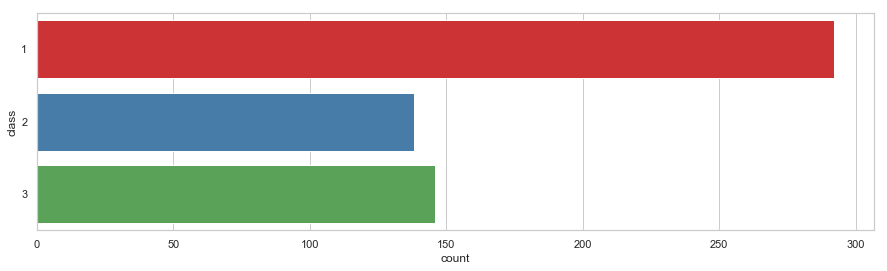

In [31]:
plt.figure(figsize=(15, 4))
sns.countplot(y=y_train)
print("Class: 1 = Car | 2 = Van | 3 = Bus")

In [32]:
from imblearn.over_sampling import SMOTE

OverSampler = SMOTE(random_state = 1)
X_train, y_train = OverSampler.fit_sample(X_train, y_train)

Class: 1 = Car | 2 = Van | 3 = Bus


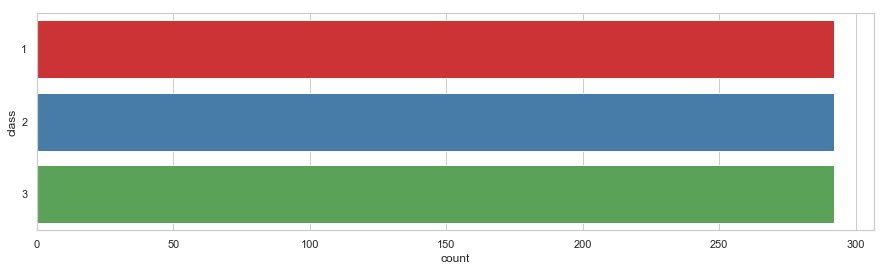

In [33]:
plt.figure(figsize=(15, 4))
sns.countplot(y=y_train)
print("Class: 1 = Car | 2 = Van | 3 = Bus")

* Data is split at 70:30 for training and testing
* Training data is balanced to match the class using SMOTE

### Step 4: Train a Support vector machine
* Using the train set and get the accuracy on the test set

In [34]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [35]:
def Multiclass_CM(Actual, Predict, Plot_width, Plot_height, Labels):
    CM = pd.DataFrame(list(zip(Actual.ravel(), Predict)), columns =['Actual', 'Predict'])
    df_CM = pd.DataFrame()
    for i in range(1, len(Labels)+1):
        CM_dict = {}
        T = (CM[(CM.Actual == i)].count()[0])
        for j in range(1, len(Labels)+1):
            CM_dict[Labels[j-1]] = (CM[(CM.Actual == i) & (CM.Predict == j)].count()[0])/T
        df_CM = df_CM.append(pd.DataFrame(CM_dict, index = [Labels[i-1]]))
    df_CM = df_CM.T
    plt.figure(figsize = (int(Plot_width), int(Plot_height)))
    plt.title('Confusion Matrix with Recall | Actual - X Axis | Predict - Y Axis', size = 18)
    return sns.heatmap(df_CM, cmap='YlGnBu', linewidths=.5, annot=True, fmt = '.2f')

In [36]:
from sklearn.model_selection import KFold

global df_Scores
df_Scores = pd.DataFrame()

def Kfold(Model, model, X, y, Smote):
    Metrics, Score = [], []
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X):
    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        if Smote == 1:
            OverSampler = SMOTE(random_state = 1)
            X_train, y_train = OverSampler.fit_sample(X_train, y_train)
        model.fit(X_train, y_train)

        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)

        for i in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
            Metrics.append(i)
        Score.append(accuracy_score(y_test, y_predict_test))
        Score.append(precision_score(y_test, y_predict_test, average="macro"))
        Score.append(recall_score(y_test, y_predict_test, average="macro"))
        Score.append(f1_score(y_test, y_predict_test, average="macro"))
    df_Scores['Metrics'], df_Scores[Model] = Metrics, Score

In [37]:
global df_Accuracy_Score
df_Accuracy_Score, df_Accuracy_Score_F = pd.DataFrame(), pd.DataFrame()

def Scorer(Model, y, y_hat):
    Metrics, Score, Score_F = [], [], []
    for i in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
        Metrics.append(i)       
    Score.append(accuracy_score(y, y_hat))
    Score_F.append(round((accuracy_score(y, y_hat))*100, 2))
    Score.append(precision_score(y, y_hat, average="macro"))
    Score_F.append(round((precision_score(y, y_hat, average="macro"))*100, 2))
    Score.append(recall_score(y, y_hat, average="macro"))
    Score_F.append(round((recall_score(y, y_hat, average="macro"))*100, 2))
    Score.append(f1_score(y, y_hat, average="macro"))
    Score_F.append(round((f1_score(y, y_hat, average="macro"))*100, 2))
    df_Accuracy_Score['Metrics'], df_Accuracy_Score[Model] = Metrics, Score
    df_Accuracy_Score_F['Metrics'], df_Accuracy_Score_F[Model] = Metrics, Score_F
    
def ScorerMean(Model):
    Metrics, Mean_Score, Confidence_Score = [], [], []
    for i in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
        Metrics.append(i)
        Mean_Score.append(df_Scores[df_Scores['Metrics'] == i][Model].mean())
        Confidence_Score.append((str(round((df_Scores[df_Scores['Metrics'] == i][Model].mean())*100, 2))) + (' ±'+ str(round((df_Scores[df_Scores['Metrics'] == i][Model].std()) * 196, 2))))
    df_Accuracy_Score['Metrics'], df_Accuracy_Score[Model] = Metrics, Mean_Score
    df_Accuracy_Score_F['Metrics'], df_Accuracy_Score_F[Model] = Metrics, Confidence_Score

In [38]:
# SVM_model = svm.SVC() 
# grid_values = [{'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['linear']},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0], 'degree':[1,2,3,4,5]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}]

# Random_model_acc = RandomizedSearchCV(SVM_model, param_distributions = grid_values, n_jobs = -2, scoring='accuracy')
# Random_model_acc.fit(X_train, y_train.ravel())

# SVM_y_predict_train = Random_model_acc.predict(X_train)
# SVM_y_predict_test = Random_model_acc.predict(X_test)

# print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, SVM_y_predict_train)))
# print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, SVM_y_predict_test)))
# print(classification_report(y_test, SVM_y_predict_test, labels=[1, 2, 3], target_names = ['Car', 'Van', 'Bus']))
# Random_model_acc.best_params_

Model Accuracy in-sample: 0.9943
Model Accuracy out of sample: 0.9839
              precision    recall  f1-score   support

         Car       1.00      0.98      0.99       130
         Van       0.95      1.00      0.97        54
         Bus       0.98      0.97      0.98        64

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



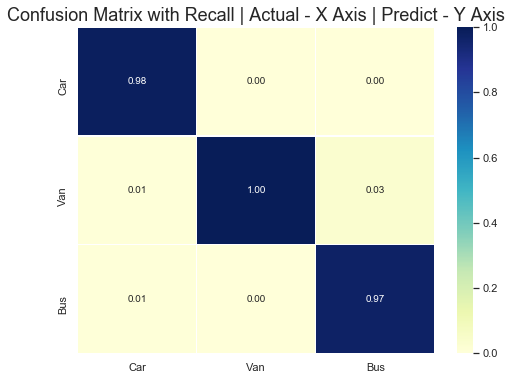

In [39]:
SVM_model = svm.SVC(C = 2.3, gamma = 0.1, kernel = 'rbf') # parameters picked after iterations in Random Search
SVM_model.fit(X_train, y_train.ravel())

SVM_y_predict_train = SVM_model.predict(X_train)
SVM_y_predict_test = SVM_model.predict(X_test)


print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, SVM_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, SVM_y_predict_test)))
Scorer('SVM', y_test, SVM_y_predict_test)
print(classification_report(y_test, SVM_y_predict_test, labels=[1, 2, 3], target_names = ['Car', 'Van', 'Bus']))
Multiclass_CM(y_test, SVM_y_predict_test, 8, 6, ['Car', 'Van', 'Bus'])

In [40]:
XFS_train, XFS_test, y_train, y_test = train_test_split(XFS, y, test_size=0.30, random_state=1)
OverSampler = SMOTE(random_state = 1)
XFS_train, y_train = OverSampler.fit_sample(XFS_train, y_train)

In [41]:
# XFS_SVM_model = svm.SVC() 
# grid_values = [{'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['linear']},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0], 'degree':[1,2,3,4,5]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}]

# Random_model_acc = RandomizedSearchCV(XFS_SVM_model, param_distributions = grid_values, n_jobs = -2, scoring='accuracy')
# Random_model_acc.fit(XFS_train, y_train.ravel())

# XFS_SVM_y_predict_train = Random_model_acc.predict(XFS_train)
# XFS_SVM_y_predict_test = Random_model_acc.predict(XFS_test)

# print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, XFS_SVM_y_predict_train)))
# print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, XFS_SVM_y_predict_test)))
# print(classification_report(y_test, XFS_SVM_y_predict_test, labels=[1, 2, 3], target_names = ['Car', 'Van', 'Bus']))
# Random_model_acc.best_params_

Model Accuracy in-sample: 0.9874
Model Accuracy out of sample: 0.9798
              precision    recall  f1-score   support

         Car       0.99      0.98      0.99       130
         Van       0.95      0.98      0.96        54
         Bus       0.98      0.97      0.98        64

    accuracy                           0.98       248
   macro avg       0.97      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



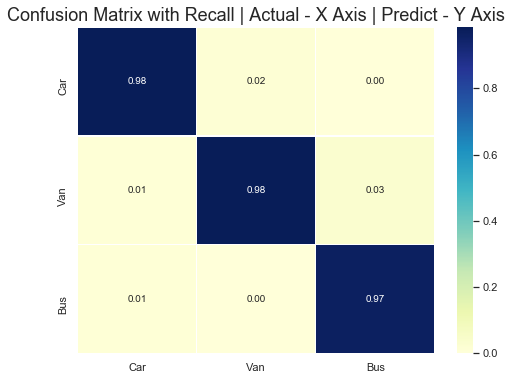

In [42]:
XFS_SVM_model = svm.SVC(C = 2.3, gamma = 0.1, kernel = 'rbf') # parameters picked after iterations in Random Search
XFS_SVM_model.fit(XFS_train, y_train.ravel())

XFS_SVM_y_predict_train = XFS_SVM_model.predict(XFS_train)
XFS_SVM_y_predict_test = XFS_SVM_model.predict(XFS_test)

print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, XFS_SVM_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, XFS_SVM_y_predict_test)))
Scorer('FS SVM', y_test, XFS_SVM_y_predict_test)
print(classification_report(y_test, XFS_SVM_y_predict_test, labels=[1, 2, 3], target_names = ['Car', 'Van', 'Bus']))
Multiclass_CM(y_test, XFS_SVM_y_predict_test, 8, 6, ['Car', 'Van', 'Bus'])

#### Two Support Vector Machines have been trained
* First model using all the features provided in the data (Model Accuracy out of sample: 0.9839)
* Second model using data after feature selection and dropping 7 columns (Model Accuracy out of sample: 0.9798)
* Both the models were fine-tuned using Random Search CV
* There is a drop of 0.41% in accuracy after dropping 7 columns
* Both the models appear to be misclassifying buses (3%) as vans
* While feature tuned model appears to be misclassifying vans (2%) as cars

### Step 5: Perform K-fold cross validation
* Get the cross validation score of the model

In [43]:
scaler = StandardScaler()
X_CV = scaler.fit_transform(df) 
XFS_CV = XFS.to_numpy()
y_CV = np.array(y)

Metrics
Accuracy      97.93 ±3.2
Precision    97.66 ±3.91
Recall       97.96 ±3.03
F1 Score     97.75 ±3.42
Name: SVM KCV, dtype: object

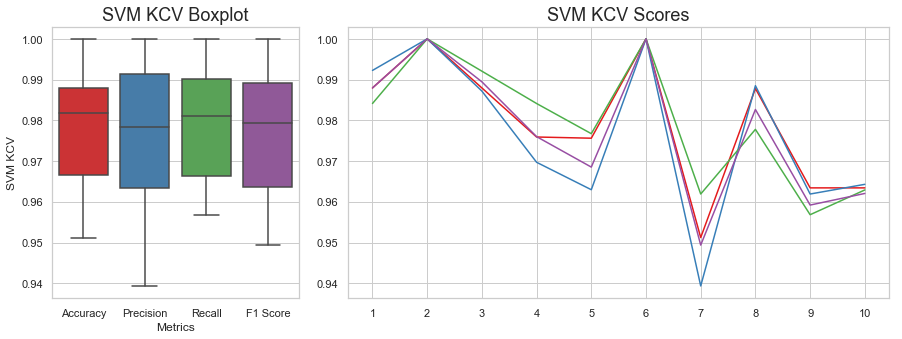

In [44]:
Kfold('SVM KCV', SVM_model, X_CV, y_CV, 1)
ScorerMean('SVM KCV')

import matplotlib.gridspec as gridspec
fig = plt.figure(1, figsize = (15, 5))
gridspec.GridSpec(1, 3)

plt.subplot2grid((1, 3), (0, 1), colspan=2, rowspan=1)
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Accuracy']['SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Precision']['SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Recall']['SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'F1 Score']['SVM KCV'])
plt.xticks(np.arange(1, 11))
plt.title('SVM KCV Scores', size = 18)

plt.subplot2grid((1, 3), (0, 0), colspan=1, rowspan=1)
plt.title('SVM KCV Boxplot', size = 18)
sns.boxplot(y='SVM KCV', x='Metrics', orient="v", data=df_Scores)
df_Accuracy_Score_F.set_index('Metrics')['SVM KCV']

Metrics
Accuracy     96.96 ±1.69
Precision    96.24 ±2.18
Recall        97.3 ±2.26
F1 Score      96.69 ±2.0
Name: FS SVM KCV, dtype: object

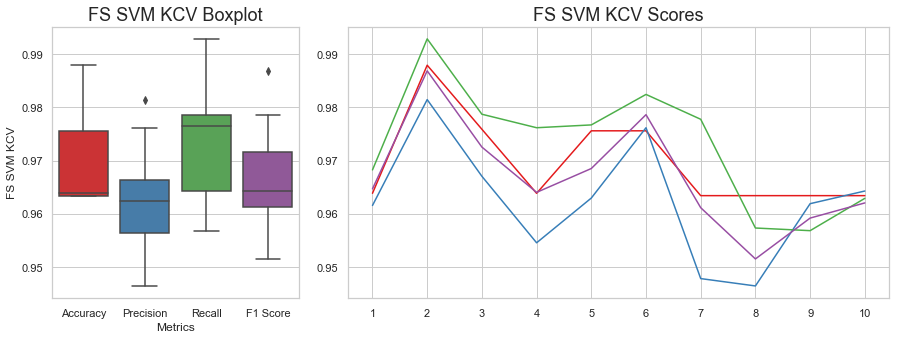

In [45]:
Kfold('FS SVM KCV', XFS_SVM_model, XFS_CV, y_CV, 1)
ScorerMean('FS SVM KCV')

fig = plt.figure(1, figsize = (15, 5))
gridspec.GridSpec(1, 3)

plt.subplot2grid((1, 3), (0, 1), colspan=2, rowspan=1)
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Accuracy']['FS SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Precision']['FS SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Recall']['FS SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'F1 Score']['FS SVM KCV'])
plt.xticks(np.arange(1, 11))
plt.title('FS SVM KCV Scores', size = 18)

plt.subplot2grid((1, 3), (0, 0), colspan=1, rowspan=1)
plt.title('FS SVM KCV Boxplot', size = 18)
sns.boxplot(y='FS SVM KCV', x='Metrics', orient="v", data=df_Scores)
df_Accuracy_Score_F.set_index('Metrics')['FS SVM KCV']

* Model using all the features gave a K Fold CV accuracy score between __94.73% - 100%__ with 95% confidence
* While model using data after feature selection & dropping 7 columns gave a K Fold CV accuracy score between __95.27% - 98.65%__ with 95% confidence

### Step 6: Use PCA from Scikit learn
* Extract Principal Components that capture about 95% of the variance in the data

In [46]:
from sklearn.decomposition import PCA
df_PCA = df

In [47]:
scale = StandardScaler()
df_PCA = scale.fit_transform(df_PCA)
pca = PCA(n_components=18)
pca.fit(df_PCA)
print(' Eigen Values', "\n", '-'*70)
print(pca.explained_variance_)
print( "\n", 'Eigen Vectors', "\n", '-'*70)
print(pca.components_)
print( "\n", 'Percentage of variation explained by each eigen Vector', "\n", '-'*70)
print(pca.explained_variance_ratio_)

 Eigen Values 
 ----------------------------------------------------------------------
[9.87636103e+00 3.30670554e+00 1.19988040e+00 1.13360575e+00
 8.79200144e-01 6.64389522e-01 3.38490821e-01 2.27540435e-01
 1.17197111e-01 8.71800102e-02 6.10232934e-02 4.51307646e-02
 2.92170523e-02 2.18647813e-02 1.51134864e-02 1.23706268e-02
 6.20361852e-03 3.96813420e-04]

 Eigen Vectors 
 ----------------------------------------------------------------------
[[-2.70993357e-01 -2.85378848e-01 -3.00884798e-01 -2.75945416e-01
  -1.07691883e-01 -1.86959432e-01 -3.09278858e-01  3.07218140e-01
  -3.06151083e-01 -2.74217636e-01 -3.02483348e-01 -3.06809258e-01
  -2.58604245e-01  6.12669424e-02 -3.80485019e-02 -5.93366460e-02
  -4.75007670e-02 -9.72094363e-02]
 [-8.82939421e-02  1.47619905e-01 -3.99827331e-02 -1.93289916e-01
  -2.46415993e-01 -6.84094966e-02  7.70164757e-02 -1.83271013e-02
   9.02720713e-02  1.35697595e-01  7.24976647e-02  7.98803743e-02
   2.18112536e-01  5.02897563e-01 -2.88201289e-02 -

Text(0.5, 0, 'Eigen Value')

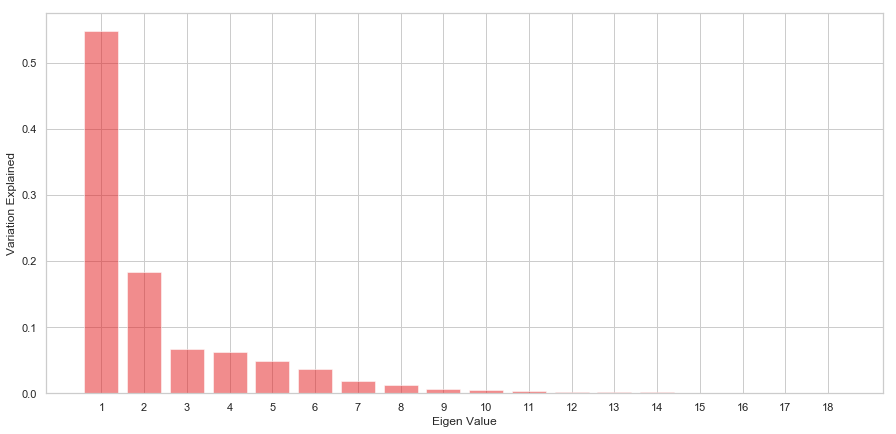

In [48]:
plt.figure(figsize=(15, 7))
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.xticks(np.arange(1, 19, step=1))
plt.ylabel('Variation Explained')
plt.xlabel('Eigen Value')

Text(0.5, 0, 'Eigen Value')

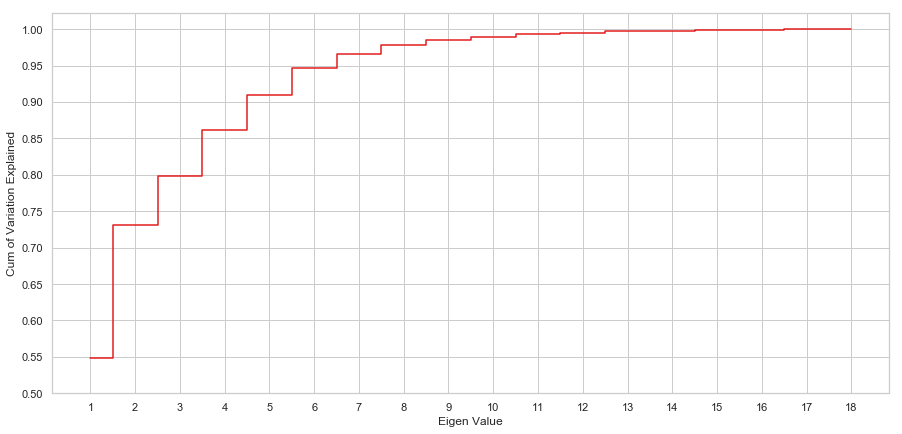

In [49]:
plt.figure(figsize=(15, 7))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.yticks(np.arange(0.5, 1.05, step=0.05))
plt.xticks(np.arange(1, 19, step=1))
plt.ylabel('Cum of Variation Explained')
plt.xlabel('Eigen Value')

Text(0.5, 0, 'Eigen Value')

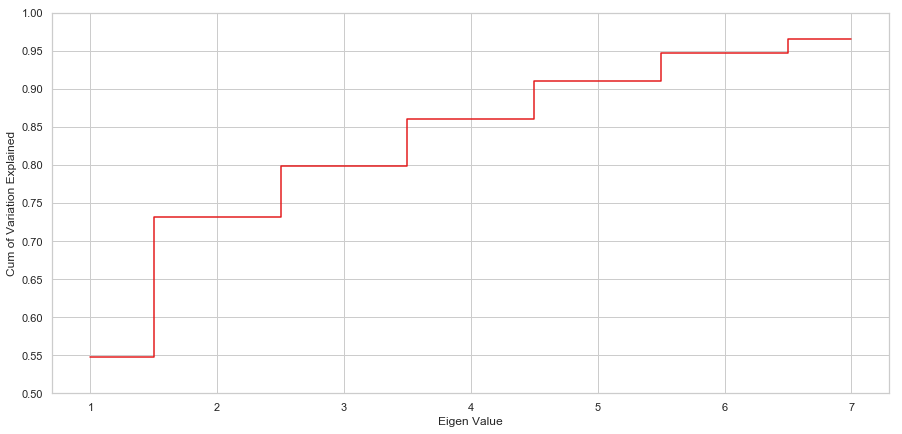

In [50]:
pca = PCA(n_components=7)
pca.fit(df_PCA)
plt.figure(figsize=(15, 7))
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.yticks(np.arange(0.5, 1.05, step=0.05))
plt.xticks(np.arange(1, 8, step=1))
plt.ylabel('Cum of Variation Explained')
plt.xlabel('Eigen Value')

In [51]:
data_PCA = pca.transform(df_PCA)

XPCA=pd.DataFrame(data=data_PCA[0:,0:],
    index=[i for i in range(data_PCA.shape[0])],
    columns=['X' + str(i) for i in range(data_PCA.shape[1])])

XPCA.head()

X0        X1        X2        X3        X4        X5        X6
0 -0.622813 -0.578024 -0.456555 -0.770652  0.915876  1.713399 -0.336217
1  1.503004 -0.373104 -0.210804  1.218156  0.403658  0.049405  0.151941
2 -3.988237  0.348158 -1.192194  0.197668 -0.783424  0.739208  0.748141
3  1.461188 -3.052145 -0.424624  0.271365  0.683240 -0.429204  0.122055
4 -6.010565  4.985515  0.797993  0.235509 -1.714086 -2.305857 -0.204869

* 6 - 7 Principal Components appear to capture about 95% of the variance in the data
* 7 Principal Components have been extracted to build the model

### Step 7: Repeat steps 3, 4 and 5
* Use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state)

In [52]:
XPCA_train, XPCA_test, y_train, y_test = train_test_split(XPCA, y, test_size=0.30, random_state=1)

In [53]:
OverSampler = SMOTE(random_state = 1)
XPCA_train, y_train = OverSampler.fit_sample(XPCA_train, y_train)

In [54]:
# SVM_model = svm.SVC() 
# grid_values = [{'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['linear']},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0], 'degree':[1,2,3,4,5]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}]

# Random_model_acc = RandomizedSearchCV(SVM_model, param_distributions = grid_values, n_jobs = -2, scoring='accuracy')
# Random_model_acc.fit(XPCA_train, y_train.ravel())

# XPCA_SVM_y_predict_train = Random_model_acc.predict(XPCA_train)
# XPCA_SVM_y_predict_test = Random_model_acc.predict(XPCA_test)

# print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, XPCA_SVM_y_predict_train)))
# print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, XPCA_SVM_y_predict_test)))
# print(classification_report(y_test, XPCA_SVM_y_predict_test, labels=[1, 2, 3], target_names = ['Car', 'Van', 'Bus']))
# Random_model_acc.best_params_

Model Accuracy in-sample: 0.9669
Model Accuracy out of sample: 0.9395
              precision    recall  f1-score   support

         Car       0.98      0.91      0.94       130
         Van       0.85      0.96      0.90        54
         Bus       0.94      0.98      0.96        64

    accuracy                           0.94       248
   macro avg       0.93      0.95      0.94       248
weighted avg       0.94      0.94      0.94       248



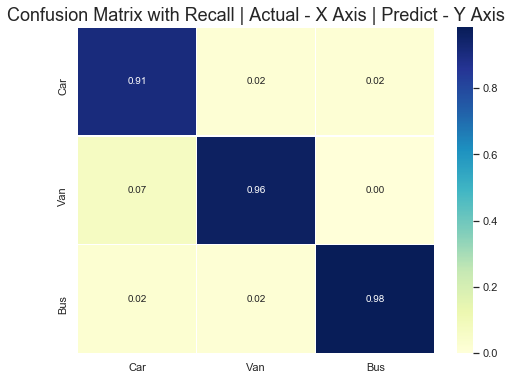

In [55]:
XPCA_SVM_model = svm.SVC(C = 1.9, gamma = 0.1, kernel = 'rbf') # parameters picked after iterations in Random Search
XPCA_SVM_model.fit(XPCA_train, y_train.ravel())

XPCA_SVM_y_predict_train = XPCA_SVM_model.predict(XPCA_train)
XPCA_SVM_y_predict_test = XPCA_SVM_model.predict(XPCA_test)

print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, XPCA_SVM_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, XPCA_SVM_y_predict_test)))
Scorer('PCA SVM', y_test, XPCA_SVM_y_predict_test)
print(classification_report(y_test, XPCA_SVM_y_predict_test, labels=[1, 2, 3], target_names = ['Car', 'Van', 'Bus']))
Multiclass_CM(y_test, XPCA_SVM_y_predict_test, 8, 6, ['Car', 'Van', 'Bus'])

Metrics
Accuracy      93.56 ±5.3
Precision     92.7 ±6.78
Recall       93.36 ±6.79
F1 Score      92.9 ±6.88
Name: PCA SVM KCV, dtype: object

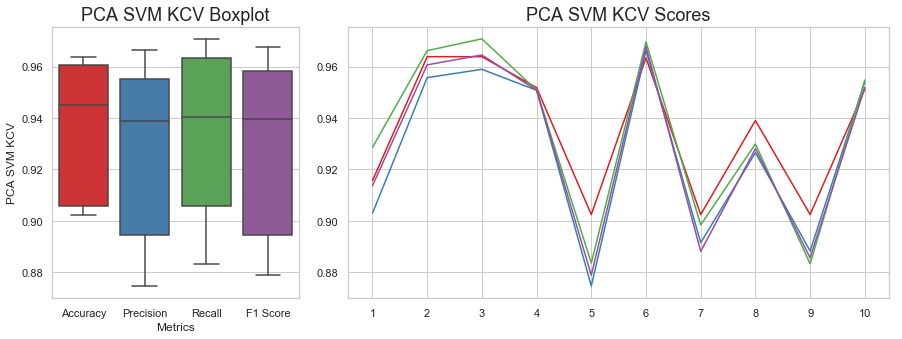

In [56]:
Kfold('PCA SVM KCV', XPCA_SVM_model, data_PCA, y_CV, 0)
ScorerMean('PCA SVM KCV')

fig = plt.figure(1, figsize = (15, 5))
gridspec.GridSpec(1, 3)

plt.subplot2grid((1, 3), (0, 1), colspan=2, rowspan=1)
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Accuracy']['PCA SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Precision']['PCA SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'Recall']['PCA SVM KCV'])
plt.plot(range (1, 11), df_Scores[df_Scores['Metrics'] == 'F1 Score']['PCA SVM KCV'])
plt.xticks(np.arange(1, 11))
plt.title('PCA SVM KCV Scores', size = 18)

plt.subplot2grid((1, 3), (0, 0), colspan=1, rowspan=1)
plt.title('PCA SVM KCV Boxplot', size = 18)
sns.boxplot(y='PCA SVM KCV', x='Metrics', orient="v", data=df_Scores)
df_Accuracy_Score_F.set_index('Metrics')['PCA SVM KCV']

* Model trained using Principal Components gave an out of sample accuracy of 0.9395
* There is a drop of 4% in accuracy of PCA model in comparison to model after feature selection (dropping 7 columns)
* Model using data after feature selection & dropping 7 columns gave a K Fold CV accuracy score between __95.27% - 98.65%__ with 95% confidence
* While model trained using Principal Components gave a K Fold CV accuracy score between __88.26% - 98.86%__ with 95% confidence

### Step 8: Compare the accuracy scores and cross validation scores
* Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

SVM  FS SVM      SVM KCV   FS SVM KCV  PCA SVM  PCA SVM KCV
Metrics                                                                 
Accuracy   98.39   97.98   97.93 ±3.2  96.96 ±1.69    93.95   93.56 ±5.3
Precision  97.72   97.43  97.66 ±3.91  96.24 ±2.18    92.54   92.7 ±6.78
Recall     98.45   97.83  97.96 ±3.03   97.3 ±2.26    95.17  93.36 ±6.79
F1 Score   98.05   97.61  97.75 ±3.42   96.69 ±2.0    93.67   92.9 ±6.88

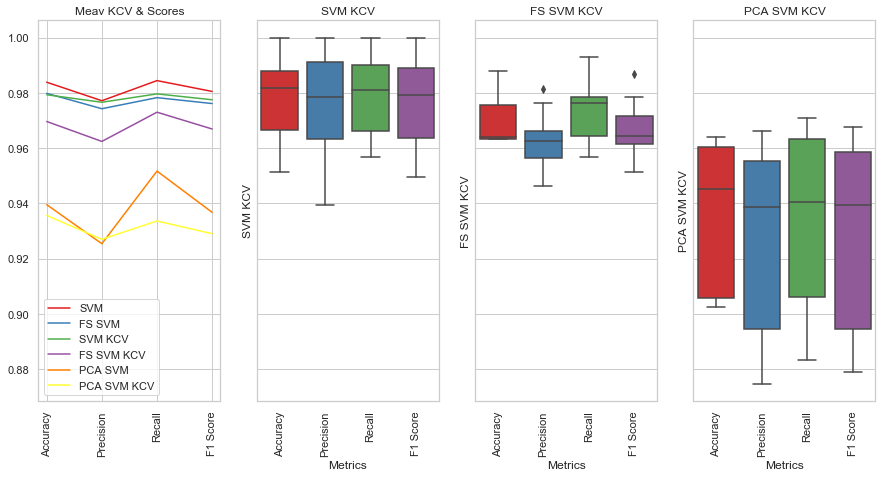

In [57]:
f, ax = plt.subplots(1, 4, sharey = True, figsize = (15, 7))
for col in df_Accuracy_Score.columns:
    if col != 'Metrics': ax[0].plot('Metrics', col, data=df_Accuracy_Score)
ax[0].legend(loc='lower left')
ax[0].title.set_text('Meav KCV & Scores')
sns.boxplot(y='SVM KCV', x='Metrics', orient="v", data=df_Scores, ax = ax[1])
ax[1].title.set_text('SVM KCV')
sns.boxplot(y='FS SVM KCV', x='Metrics', orient="v", data=df_Scores, ax = ax[2])
ax[2].title.set_text('FS SVM KCV')
sns.boxplot(y='PCA SVM KCV', x='Metrics', orient="v", data=df_Scores, ax = ax[3])
ax[3].title.set_text('PCA SVM KCV')
for i in range(0, 4): plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=90)
df_Accuracy_Score_F.set_index('Metrics')

#### Summary - Three Support Vector Machines were trained
* First model __(SVM)__ using all the features provided in the data (Model Accuracy out of sample: 0.9839)
* Second model __(FS SVM)__ using data after feature selection and dropping 7 columns (Model Accuracy out of sample: 0.9798)
* Third model __(PCA SVM)__ trained using Principal Components (Model Accuracy out of sample: 0.9395)
* There was a drop of __0.41%__ in out of sample accuracy for second model relative to first model & a drop of __4%__ for third model in comparison to second model
* First model __(SVM KCV)__ gave a K Fold CV accuracy score between __94.73% - 100%__, second model __(FS SVM KCV)__ gave between __95.27% - 98.65%__, while third model __(PCA SVM KCV)__ gave between __88.26% - 98.86%__, all with 95% confidence